<a href="https://colab.research.google.com/github/Temple2001/ML_practice/blob/main/codes/FashionMnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# fashion-mnist에서 이미 shuffled 된 train data 와 test data 를 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train.shape : ", x_train.shape, "y_train.shape : ", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape :  (60000, 28, 28) y_train.shape :  (60000,)


60000 train set
10000 test set
y = 1 Trouser


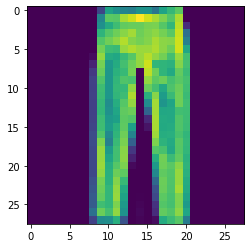

In [3]:
# training datasets 와 test datasets 의 수 출력
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# test label 정의
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# 0 ~ 59,999
img_index = 16
# 정답 index
label_index = y_train[img_index]
# 정답 출력
print("y = " + str(label_index) + " " + (fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

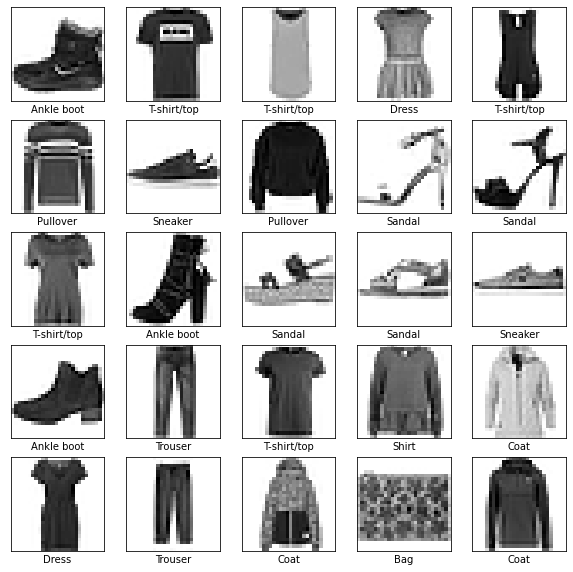

In [5]:
# 25개의 데이터 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_mnist_labels[y_train[i]])
plt.show()

In [6]:
n_kernels = 8
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=n_kernels, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(filters=n_kernels*2, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=n_kernels*4, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
x_train = np.expand_dims(x_train, axis=-1)

log = model.fit(x_train, y_train, validation_split=0.2, epochs=20, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 25s 511us/sample - loss: 0.6325 - acc: 0.7742 - val_loss: 0.4785 - val_acc: 0.8263
Epoch 2/20
48000/48000 [==============================] - 23s 485us/sample - loss: 0.4191 - acc: 0.8501 - val_loss: 0.4372 - val_acc: 0.8433
Epoch 3/20
48000/48000 [==============================] - 23s 487us/sample - loss: 0.3744 - acc: 0.8644 - val_loss: 0.3745 - val_acc: 0.8671
Epoch 4/20
48000/48000 [==============================] - 24s 490us/sample - loss: 0.3483 - acc: 0.8746 - val_loss: 0.3701 - val_acc: 0.8659
Epoch 5/20
48000/48000 [==============================] - 24s 499us/sample - loss: 0.3296 - acc: 0.8802 - val_loss: 0.3481 - val_acc: 0.8748
Epoch 6/20
48000/48000 [==============================] - 24s 495us/sample - loss: 0.3137 - acc: 0.8865 - val_loss: 0.3357 - val_acc: 0.8801
Epoch 7/20
48000/48000 [==============================] - 23s 480us/sample - loss: 0.3029 - acc: 0.8897 

In [10]:
history_dict = log.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

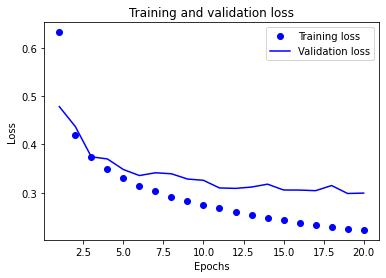

In [11]:
import matplotlib.pyplot as plt

acc = log.history['acc']
val_acc = log.history['val_acc']
loss = log.history['loss']
val_loss = log.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

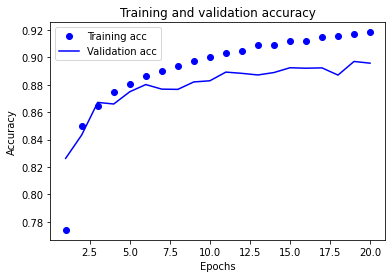

In [12]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
x_test = np.expand_dims(x_test, axis=-1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n테스트 정확도 : ', test_acc)

10000/10000 - 2s - loss: 0.3084 - acc: 0.8922

테스트 정확도 :  0.8922


In [14]:
# Prediction
predictions = model.predict(x_test)
print(predictions[0])
np.argmax(predictions[0])
fashion_mnist_labels[np.argmax(predictions[0])]

[9.83322821e-07 5.52561198e-13 1.09304866e-11 5.40239520e-15
 8.18334844e-10 2.50632675e-05 3.63056335e-10 2.20563705e-03
 2.76146829e-06 9.97765541e-01]


'Ankle boot'